# 1. Defining Problem Statement and Analysing basic metrics

##  1.1 Business Problem
Analyse data and generate insights to help Netflix decide 
- which type of show/movies to produce
- How to grow business in different countries

## 1.2 Data Problem definition
Netflix has provided dataset containing details of various movies and TV shows.   
We have to analyse this data to identify  
- popular type of show/movies based on  data
- grow revenue by increasing the more popular type of show/movies in countries

##  1.3 Metrics
Following metrics can be used to measure benefits of using this analysis/modelling. We can measure effectiveness of recomendation using below metrics for type of show after implementing .     
 1.  **Movie/TV Shows Count per month** : higher count indicates popularity among viewers
 2.  **Viewer Count per month** : higher count indicates popularity among viewers
 3. **Viewer Hours per month**   : higher hours indicates popularity among viewers   
 4. **Ad Revenue  per month** : higher ads indicates higher revenue in country
 5. **Sponsor money per month** : higher amount indicates greater revenue in country
 

# 2. Observations of data  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('netflix.csv')

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## 2.1 Shape of data  

In [117]:
#shape of data
df.shape

(8807, 12)

The dataset has 8807 records(rows) with 12 features(columns).

## 2.2 Datatype of attributes  

In [118]:
#info on features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [119]:
df.dtypes.value_counts()

object    11
int64      1
dtype: int64

The Dataset has 11 Columns(Features)  
  - release_year is numeric
  - date_added is date type
  - type,rating is categorical
  - other columns are string(object) type

## 2.2a conversion of categorical attributes to 'category  

 **categorical data** is data which takes on a *finite number of possible values.*    
 Convert columns type,rating to category type

In [3]:
df['type'] = df['type'].astype('category')
df['rating'] = df['rating'].astype('category')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
 12  add_yr        8797 non-null   float64       
 13  add_mn        8797 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(10)
memory usage: 963.4+ KB


## 2.3 missing value dectection  

In [6]:
df.isnull().sum() 

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

- Most of nulls are in columns director,cast,country 
- columns date_added,rating,duration have very few nulls

## 2.4 statistical summary  

In [10]:
df.describe()

,release_year,add_yr,add_mn
count,8807.000000,8797.000000,8797.000000
mean,2014.180198,2018.871888,6.654996
std,8.819312,1.574243,3.436554
min,1925.000000,2008.000000,1.000000
25%,2013.000000,2018.000000,4.000000
50%,2017.000000,2019.000000,7.000000
75%,2019.000000,2020.000000,10.000000
max,2021.000000,2021.000000,12.000000


- Column 'release_year' is numeric   
- range is 1925 to 2021

In [11]:
df.describe(include = 'object')

,show_id,type,title,director,cast,country,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,3207,1793,362,4


Above data indicates show_id,title columns are unique (freq=1)

# 3. Non-Graphical Analysis: Value counts and unique attributes 

In [12]:
#list of all features
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'add_yr', 'add_mn'],
      dtype='object')

In [13]:
#display unique value count for all columns
for c in df.columns:
    print(c,' :',df[c].nunique()) 

show_id  : 8807
type  : 2
title  : 8807
director  : 4528
cast  : 7692
country  : 748
date_added  : 1714
release_year  : 74
rating  : 17
duration  : 220
listed_in  : 514
description  : 8775
add_yr  : 14
add_mn  : 12


## 3.1 list unique values of columns to gain more insight

In [34]:
df['show_id'].value_counts()

s1       1
s5875    1
s5869    1
s5870    1
s5871    1
        ..
s2931    1
s2930    1
s2929    1
s2928    1
s8807    1
Name: show_id, Length: 8807, dtype: int64

The values of show_id shows that the value is unique for each record. So it can be used as primary key(record identifier)

In [16]:
df['type'].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

This Column shows the type of content. There are two types namely Movie,TV Show

In [6]:
df['type'].value_counts(normalize=True).round(4)*100

Movie      69.62
TV Show    30.38
Name: type, dtype: float64

The above data shows Netflix produces 70% movies and 30% TV shows.

In [20]:
df['title'].value_counts()

Dick Johnson Is Dead                     1
Ip Man 2                                 1
Hannibal Buress: Comedy Camisado         1
Turbo FAST                               1
Masha's Tales                            1
                                        ..
Love for Sale 2                          1
ROAD TO ROMA                             1
Good Time                                1
Captain Underpants Epic Choice-o-Rama    1
Zubaan                                   1
Name: title, Length: 8807, dtype: int64

The above display show 'title' is unique for each record

In [34]:
df['director'].value_counts(dropna=False)

NaN                               2634
Rajiv Chilaka                       19
Raúl Campos, Jan Suter              18
Suhas Kadav                         16
Marcus Raboy                        16
                                  ... 
Raymie Muzquiz, Stu Livingston       1
Joe Menendez                         1
Eric Bross                           1
Will Eisenberg                       1
Mozez Singh                          1
Name: director, Length: 4529, dtype: int64

The above display show that "director" column contains list data.This has to be processed and flattened to prevent discrepancy in analysis

In [35]:
df['cast'].value_counts(dropna=False)

NaN                                                                                                                                                                                           825
David Attenborough                                                                                                                                                                             19
Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jigna Bhardwaj, Rajesh Kava, Mousam, Swapnil                                                                                                        14
Samuel West                                                                                                                                                                                    10
Jeff Dunham                                                                                                                                                                                     7
                              

The above display show that "cast" column contains list data.This has to be processed and flattened to prevent discrepancy in analysis

In [36]:
df['country'].value_counts(dropna=False)

United States                             2818
India                                      972
NaN                                        831
United Kingdom                             419
Japan                                      245
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: country, Length: 749, dtype: int64

The above display show that "country" column contains list data.This has to be processed and flattened to prevent discrepancy in analysis. 

In [41]:
df['date_added'].value_counts()

January 1, 2020      109
November 1, 2019      89
March 1, 2018         75
December 31, 2019     74
October 1, 2018       71
                    ... 
December 4, 2016       1
November 21, 2016      1
November 19, 2016      1
November 17, 2016      1
January 11, 2020       1
Name: date_added, Length: 1767, dtype: int64

The above display show that "date_added" column contains dates.This can be used to identify time trends

In [42]:
df['release_year'].value_counts()

2018    1147
2017    1032
2019    1030
2020     953
2016     902
        ... 
1959       1
1925       1
1961       1
1947       1
1966       1
Name: release_year, Length: 74, dtype: int64

The above display show that "release_year" column contains year.Most releases are in 2018,2017,2019

In [8]:
df['rating'].value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

The above display show  "rating" for the content. This identifies the target audience for content.   
Also there are 3 records with "min" which is not a "rating" value but "duration"

In [44]:
df['duration'].value_counts()

1 Season     1793
2 Seasons     425
3 Seasons     199
90 min        152
94 min        146
             ... 
16 min          1
186 min         1
193 min         1
189 min         1
191 min         1
Name: duration, Length: 220, dtype: int64

The above display show  "duration" for the content. The most common is "1 Season"

In [45]:
df['listed_in'].value_counts()

Dramas, International Movies                          362
Documentaries                                         359
Stand-Up Comedy                                       334
Comedies, Dramas, International Movies                274
Dramas, Independent Movies, International Movies      252
                                                     ... 
Kids' TV, TV Action & Adventure, TV Dramas              1
TV Comedies, TV Dramas, TV Horror                       1
Children & Family Movies, Comedies, LGBTQ Movies        1
Kids' TV, Spanish-Language TV Shows, Teen TV Shows      1
Cult Movies, Dramas, Thrillers                          1
Name: listed_in, Length: 514, dtype: int64

The above display shows genre or categor for the content. This column contains list data which needs to be flattened

In [46]:
df['description'].value_counts()

Paranormal activity at a lush, abandoned property alarms a group eager to redevelop the site, but the eerie events may not be as unearthly as they think.    4
Challenged to compose 100 songs before he can marry the girl he loves, a tortured but passionate singer-songwriter embarks on a poignant musical journey.    3
A surly septuagenarian gets another chance at her 20s after having her photo snapped at a studio that magically takes 50 years off her life.                 3
Multiple women report their husbands as missing but when it appears they are looking for the same man, a police officer traces their cryptic connection.     3
Secrets bubble to the surface after a sensual encounter and an unforeseen crime entangle two friends and a woman caught between them.                        2
                                                                                                                                                            ..
Sent away to evade an arranged marriage, a 14-

This is a text column which describes the content.

#  4 Visual Analysis

##   4.0 Preprocessing nested columns

we flatten list data by 
- split data using "," as separator.
- use **explode()** to separate list data into rows

In [4]:
#split data
xcountry =df['country'].str.split(',').explode()
xcountry = xcountry.str.strip()

#flatten column
xdirector =df['director'].str.split(',').explode()
xdirector = xdirector.str.strip()

#flatten column
xcast =df['cast'].str.split(',').explode()
xcast = xcast.str.strip()

#flatten column
xlisted_in =df['listed_in'].str.split(',').explode()
xlisted_in = xlisted_in.str.strip()

In [5]:
#--------------------------
## feature engineering  
#--------------------------
#Convert 'date_added' to datetime type
df['date_added'] = df['date_added'].astype('datetime64')

df['date_added'] = df['date_added'].astype('datetime64')
#create column for year and month for easier analysis
df['add_yr']= df['date_added'].dt.year 
df['add_mn'] =df['date_added'].dt.month

## 4.1 Univariate Analysis

## 4.1.1 Box Plot for Categorical features

###  4.1.1-1 Country

In [13]:
xcountry.head(9)

0    United States
1     South Africa
2              NaN
3              NaN
4            India
5              NaN
6              NaN
7    United States
7            Ghana
Name: country, dtype: object

In [14]:
#get total of all countries
xcountry.nunique()

123

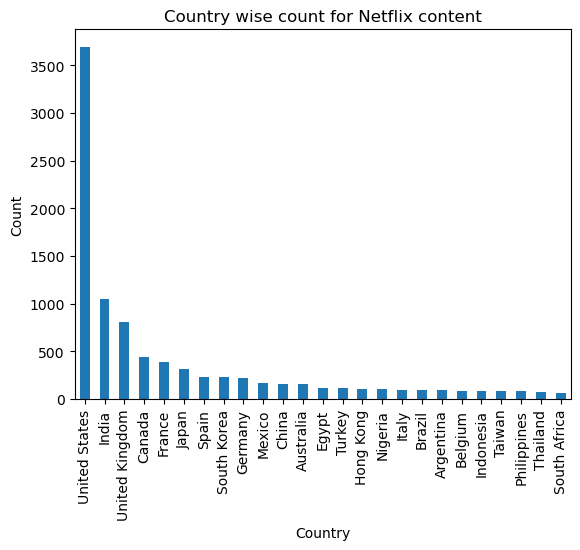

In [15]:
#plot graph
xcountry.value_counts()[:25].plot(kind="bar")
plt.title("Country wise count for Netflix content")
plt.xlabel("Country")
plt.ylabel("Count")
plt.show()

In [16]:
#get %count of country
xcountry.fillna('unknown').value_counts(normalize=True).round(4)*100 

United States     34.01
India              9.64
unknown            7.66
United Kingdom     7.43
Canada             4.10
                  ...  
Ecuador            0.01
Armenia            0.01
Mongolia           0.01
Bahamas            0.01
Montenegro         0.01
Name: country, Length: 124, dtype: float64

In [17]:
#get share of top 5 country
xcountry.fillna('unknown').value_counts(normalize=True)[:5].sum()

0.6283870967741936

1. Netflix operates in **123** countries.
2. This column has **7.6%** missing data. Since this is an important column of business significance. Efforts should be made to keep missing data minimum for this feature.  
3. The Top 5 markets for Netflix are as below.They comprise **63  %** of market.    

|Country|%Share|
|----|---|
| United States | 36.83 |
| India | 10.44 |
| United Kingdom | 8.04 |
| Canada | 4.44 |
| France | 3.92 |

###  4.1.1-2 Director

In [18]:
xdirector.nunique()

4993

In [35]:
xdirector.drop_duplicates().nunique()

4993

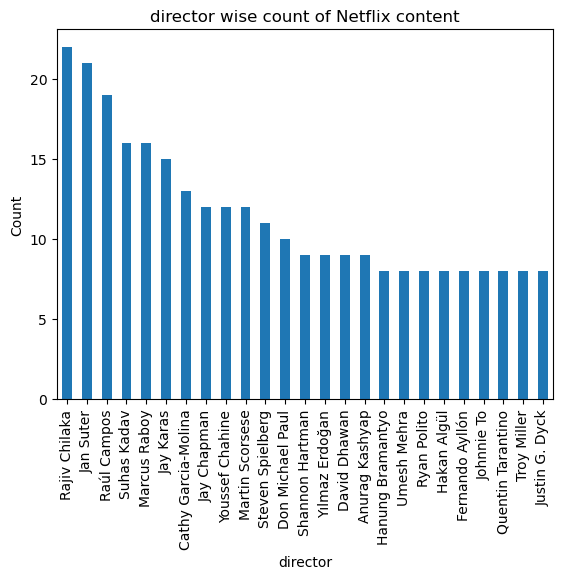

In [19]:
#plot graph
xdirector.value_counts()[:25].plot(kind="bar")
plt.title("director wise count of Netflix content")
plt.xlabel("director")
plt.ylabel("Count")
plt.show()

In [20]:
#get counts including missing values
xdirector.fillna('unknown').value_counts()

unknown           2634
Rajiv Chilaka       22
Jan Suter           21
Raúl Campos         19
Suhas Kadav         16
                  ... 
Raymie Muzquiz       1
Stu Livingston       1
Joe Menendez         1
Eric Bross           1
Mozez Singh          1
Name: director, Length: 4994, dtype: int64

In [21]:
xdirector.value_counts()

Rajiv Chilaka     22
Jan Suter         21
Raúl Campos       19
Suhas Kadav       16
Marcus Raboy      16
                  ..
Raymie Muzquiz     1
Stu Livingston     1
Joe Menendez       1
Eric Bross         1
Mozez Singh        1
Name: director, Length: 4993, dtype: int64

1. There are total of 4993 directors
2. this column has  2634 unknown values          
3. The top 5 directors are as below. 

- Rajiv Chilaka     22
- Jan Suter         21
- Raúl Campos       19
- Suhas Kadav       16
- Marcus Raboy      16

###  4.1.1-3  cast

In [22]:
#get total count
xcast.nunique()

36439

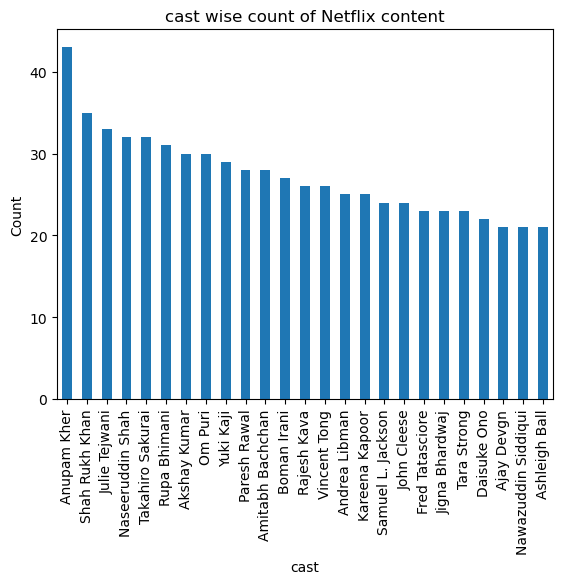

In [23]:
#plot graph
xcast.value_counts()[:25].plot(kind="bar")
plt.title("cast wise count of Netflix content")
plt.xlabel("cast")
plt.ylabel("Count")
plt.show()

In [24]:
#get counts including missing values
xcast.fillna('unknown').value_counts() 

unknown                    825
Anupam Kher                 43
Shah Rukh Khan              35
Julie Tejwani               33
Naseeruddin Shah            32
                          ... 
Melanie Straub               1
Gabriela Maria Schmeide      1
Helena Zengel                1
Daniel Valenzuela            1
Chittaranjan Tripathy        1
Name: cast, Length: 36440, dtype: int64

In [25]:
xcast.value_counts() 

Anupam Kher                43
Shah Rukh Khan             35
Julie Tejwani              33
Naseeruddin Shah           32
Takahiro Sakurai           32
                           ..
Maryam Zaree                1
Melanie Straub              1
Gabriela Maria Schmeide     1
Helena Zengel               1
Chittaranjan Tripathy       1
Name: cast, Length: 36439, dtype: int64

1. There are total of 36,439 actors
2. this column has  825 unknown values          
3. The top 5 cast are as below. 

- Anupam Kher                43
- Shah Rukh Khan             35
- Julie Tejwani              33
- Naseeruddin Shah           32
- Takahiro Sakurai           32

###  4.1.1-4  listed_in

In [26]:
#flatten column
xlisted_in =df['listed_in'].str.split(',').explode()
xlisted_in = xlisted_in.str.strip()
#get total count
xlisted_in.nunique()

42

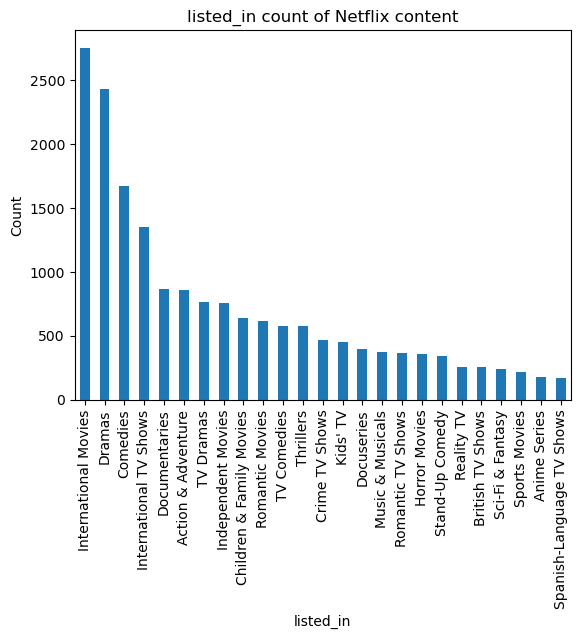

In [27]:
#plot graph
xlisted_in.value_counts()[:25].plot(kind="bar")
plt.title("listed_in count of Netflix content")
plt.xlabel("listed_in")
plt.ylabel("Count")
plt.show()

In [28]:
xlisted_in.fillna('unknown').value_counts(normalize=True).round(4)*100 

International Movies            14.24
Dramas                          12.56
Comedies                         8.66
International TV Shows           6.99
Documentaries                    4.50
Action & Adventure               4.45
TV Dramas                        3.95
Independent Movies               3.91
Children & Family Movies         3.32
Romantic Movies                  3.19
TV Comedies                      3.01
Thrillers                        2.99
Crime TV Shows                   2.43
Kids' TV                         2.33
Docuseries                       2.04
Music & Musicals                 1.94
Romantic TV Shows                1.91
Horror Movies                    1.85
Stand-Up Comedy                  1.78
Reality TV                       1.32
British TV Shows                 1.31
Sci-Fi & Fantasy                 1.26
Sports Movies                    1.13
Anime Series                     0.91
Spanish-Language TV Shows        0.90
TV Action & Adventure            0.87
Korean TV Sh

In [29]:
xlisted_in.fillna('unknown').value_counts(normalize=True)[:5].sum()

0.4695440666563163

1. There are total of **42** listed types
2. The top 5 listed types are as below. They comprise **47%** of content   

|listed_in|%Share|
|----|---|
| International Movies | 14.24 |
| Dramas | 12.56 |
| Comedies | 8.66 |
| International TV Shows | 6.99 |
| Documentaries | 4.50 |


###  4.1.1-5  rating

In [30]:
df['rating'].nunique()

17

In [31]:
df['rating'].value_counts(normalize=True).round(4)*100 

TV-MA       36.43
TV-14       24.54
TV-PG        9.80
R            9.08
PG-13        5.57
TV-Y7        3.79
TV-Y         3.49
PG           3.26
TV-G         2.50
NR           0.91
G            0.47
TV-Y7-FV     0.07
NC-17        0.03
UR           0.03
74 min       0.01
84 min       0.01
66 min       0.01
Name: rating, dtype: float64

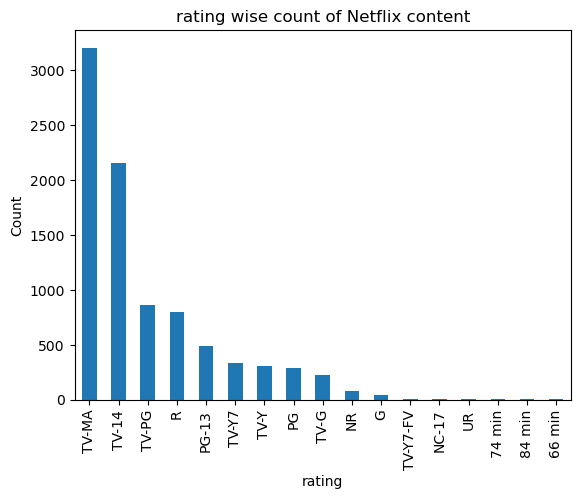

In [32]:
df['rating'].value_counts()[:25].plot(kind="bar")
plt.title("rating wise count of Netflix content")
plt.xlabel("rating")
plt.ylabel("Count")
plt.show()

In [33]:
df['rating'].value_counts(normalize=True)[:5].sum()

0.8541406338748154

1. There are total of 17 ratings
2. this column has  4 unknown values.Alsothere are few values having minutes.These should be moved to duration column       
3. The top 5 ratings are as below. they constitute 85% of rating

- TV-MA       36.43
- TV-14       24.54
- TV-PG        9.80
- R            9.08
- PG-13        5.57

###  4.1.1-6  duration

In [34]:
df['duration'].isnull().sum()

3

In [35]:
df['duration'].nunique()

220

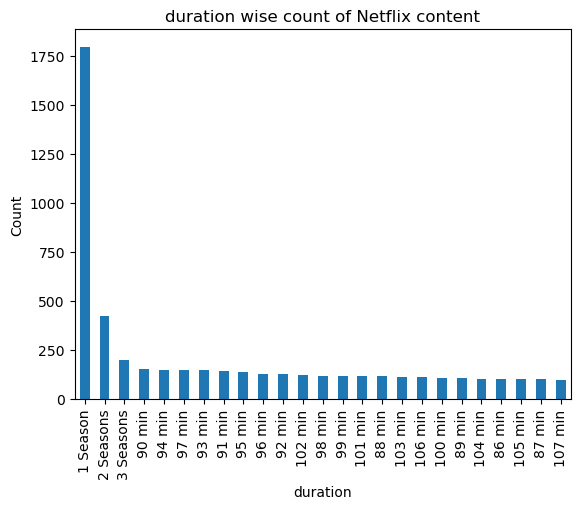

In [36]:
df['duration'].value_counts()[:25].plot(kind="bar")
plt.title("duration wise count of Netflix content")
plt.xlabel("duration")
plt.ylabel("Count")
plt.show()

In [37]:
df['duration'].value_counts(normalize=True).round(4)*100 

1 Season     20.37
2 Seasons     4.83
3 Seasons     2.26
90 min        1.73
94 min        1.66
             ...  
16 min        0.01
186 min       0.01
193 min       0.01
189 min       0.01
191 min       0.01
Name: duration, Length: 220, dtype: float64

In [38]:
df['duration'].value_counts(normalize=True)[:5].sum()

0.30838255338482506

1. There are total of 220 duration
2. this column has  3 unknown values. 
3. The top 5 duration are as below. they constitute 31% of duration

- 1 Season     20.37
- 2 Seasons     4.83
- 3 Seasons     2.26
- 90 min        1.73
- 94 min        1.66

###  4.1.1-7  type

In [39]:
df['type'].nunique()

2

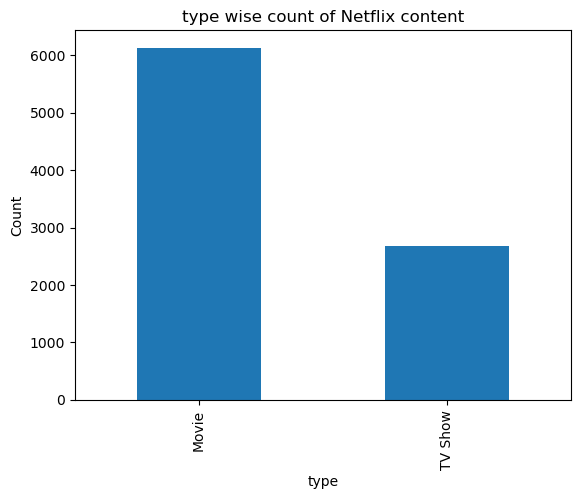

In [40]:
df['type'].value_counts().plot(kind="bar")
plt.title("type wise count of Netflix content")
plt.xlabel("type")
plt.ylabel("Count")
plt.show()

In [41]:
df['type'].value_counts(normalize=True).round(4)*100 

Movie      69.62
TV Show    30.38
Name: type, dtype: float64

1. There are total of 2 types
2. The top type is **"Movie"**  constituting **70%** of type. **Tv Shows** constitute remaining **30%**

###  4.1.1-8  date_added (year )

In [42]:
df['date_added'].isnull().sum()

10

In [43]:
add_yr=df['date_added'].dt.year 

In [44]:
add_yr.describe()

count    8797.000000
mean     2018.871888
std         1.574243
min      2008.000000
25%      2018.000000
50%      2019.000000
75%      2020.000000
max      2021.000000
Name: date_added, dtype: float64

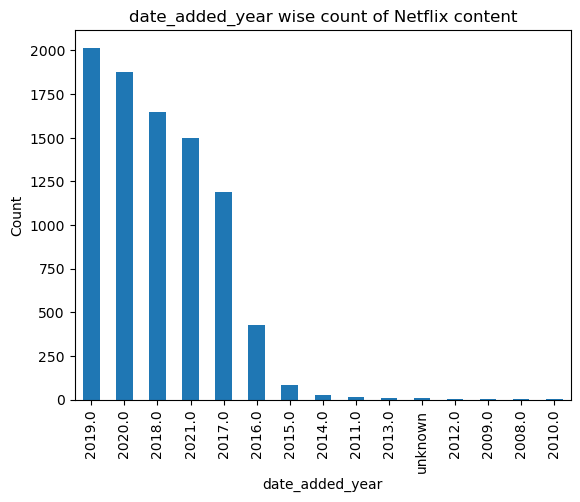

In [45]:
add_yr.fillna('unknown').value_counts()[:25].plot(kind="bar")
plt.title("date_added_year wise count of Netflix content")
plt.xlabel("date_added_year")
plt.ylabel("Count")
plt.show()

In [46]:
add_yr.fillna('unknown').value_counts() 

2019.0     2016
2020.0     1879
2018.0     1649
2021.0     1498
2017.0     1188
2016.0      429
2015.0       82
2014.0       24
2011.0       13
2013.0       11
unknown      10
2012.0        3
2009.0        2
2008.0        2
2010.0        1
Name: date_added, dtype: int64

In [47]:
add_yr.fillna('unknown').value_counts(normalize=True)[:5].sum()

0.9344839332349267

1. This column has 10 unknown values. 
2. The top 5 entries are as below. they constitute 93% of values.So most activity is in years 2017 to 2021

|added_year|Count|
|----|---|
| 2019 | 2016 |
| 2020 | 1879 |
| 2018 | 1649 |
| 2021 | 1498 |
| 2017 | 1188 |

###  4.1.1-9  date_added (month )

In [48]:
add_mn =df['date_added'].dt.month

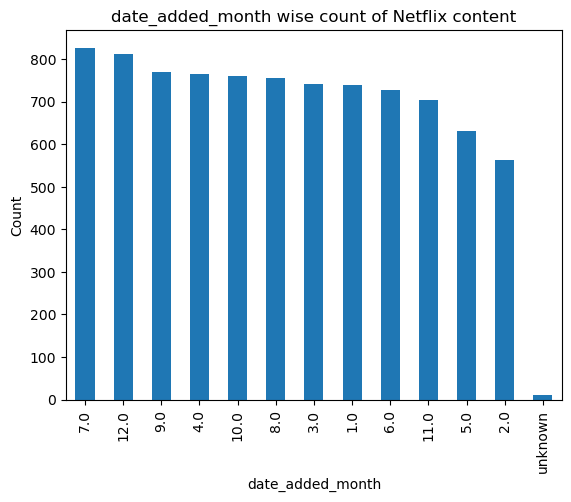

In [49]:
add_mn.fillna('unknown').value_counts()[:25].plot(kind="bar")
plt.title("date_added_month wise count of Netflix content")
plt.xlabel("date_added_month")
plt.ylabel("Count")
plt.show()

In [50]:
add_mn.fillna('unknown').value_counts() 

7.0        827
12.0       813
9.0        770
4.0        764
10.0       760
8.0        755
3.0        742
1.0        738
6.0        728
11.0       705
5.0        632
2.0        563
unknown     10
Name: date_added, dtype: int64

In [51]:
add_mn.fillna('unknown').value_counts(normalize=True)[:5].sum()

0.44669013284887016

1. This column gives info on month wise activity
2. The top 5 entries are as below. they constitute 45% of values.These month are the most active months
 

|added_month|Count|
|----|---|
| 7 | 827 |
|12 | 813 |
| 9 | 770 |
| 4 | 764 |
| 10 | 760 |

## 4.1.2  Plot for Numeric features

### release_year

In [52]:
df['release_year'].fillna('unknown').value_counts() 

2018    1147
2017    1032
2019    1030
2020     953
2016     902
        ... 
1959       1
1925       1
1961       1
1947       1
1966       1
Name: release_year, Length: 74, dtype: int64

In [53]:
df['release_year'].describe()

count    8807.000000
mean     2014.180198
std         8.819312
min      1925.000000
25%      2013.000000
50%      2017.000000
75%      2019.000000
max      2021.000000
Name: release_year, dtype: float64

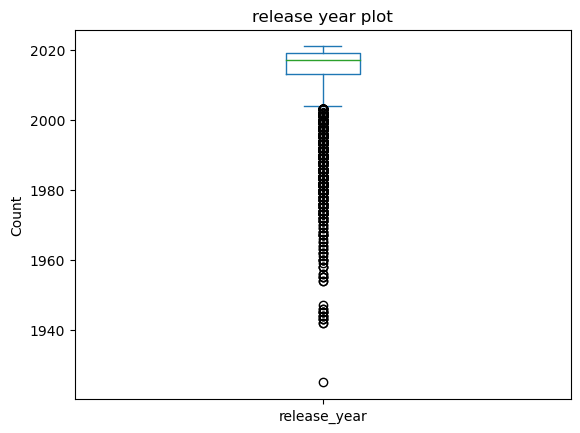

In [54]:
df['release_year'].plot(kind="box")
plt.title('release year plot')
plt.ylabel("Count" )
plt.show()

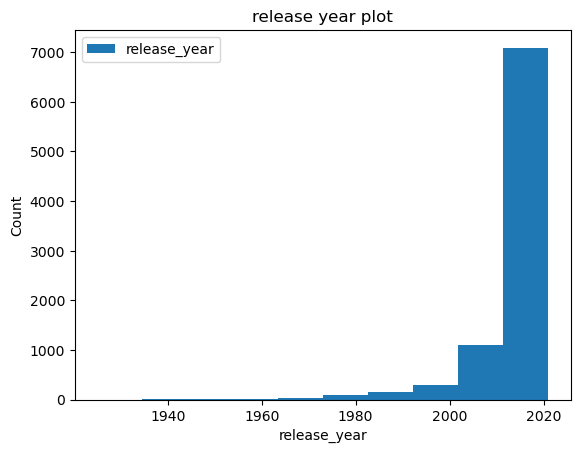

In [55]:
df['release_year'].plot(kind="hist")
plt.legend()
plt.title('release year plot')
plt.xlabel("release_year")
plt.ylabel("Count" )
plt.show()

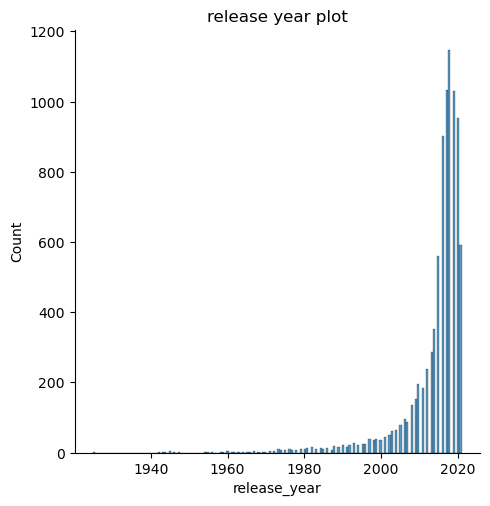

In [56]:
sns.displot(df['release_year'])
plt.title('release year plot')
plt.show()

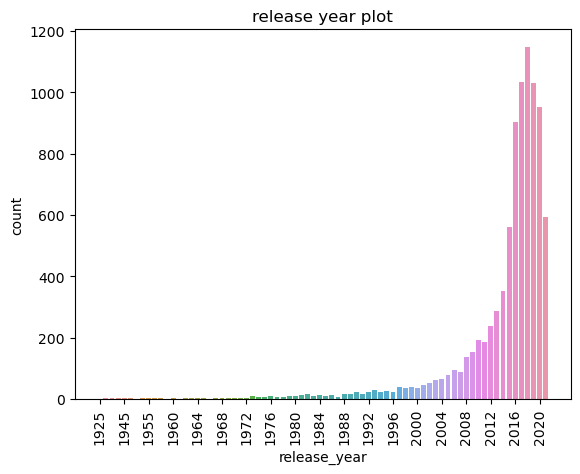

In [6]:
sns.countplot(x ='release_year', data = df)
plt.title('release year plot')
plt.xticks(rotation=90) 
#https://stackoverflow.com/questions/54783160/x-axis-tick-labels-are-too-dense-when-drawing-plots-with-matplotlib
plt.locator_params(axis='x', nbins=20)
plt.show()

In [11]:
df['release_year'].value_counts(bins=[1920,2000,2022],normalize=True).round(4)*100

(2000.0, 2022.0]      93.62
(1919.999, 2000.0]     6.38
Name: release_year, dtype: float64

**release_year** 

- above data/graph shows that  **release year range = (1925,2021)**
-**93.6 %** of content released after 2000
- **6.4%** content released before 2000. These could be classical or historic content.

## 4.2 Bi-variate Analysis

### 4.2.1 How has number of movies released per year changed over the last 20-30 years?

In [ ]:
'''
columns used
-------
df['type']=Movie
df['release_year']
'''

In [28]:
# grp_mov=df.groupby(['type','release_year'])['show_id'].count().reset_index()
# grp_mov=grp_mov[grp_mov['type']=='Movie']

In [62]:
pv_type=pd.pivot_table(df,index=["type",'release_year'],
                   columns=['type'],
                   aggfunc='size').reset_index()

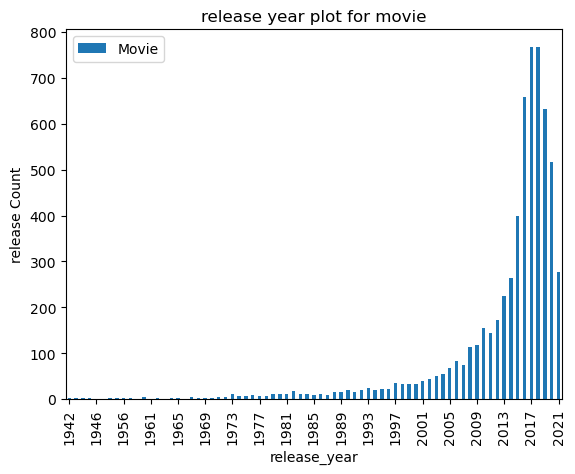

In [63]:
pv_type[pv_type['Movie'].notnull()].plot(kind='bar',x='release_year',y= 'Movie')
#https://stackoverflow.com/questions/54783160/x-axis-tick-labels-are-too-dense-when-drawing-plots-with-matplotlib
plt.locator_params(axis='x', nbins=20)
plt.title('release year plot for movie')
plt.ylabel("release Count" )
plt.show()

The plot shows that from year 2001, the number of movies released has jumped drastically

### 4.2.2 Comparison of tv shows vs. movies.

In [ ]:
'''
columns used
-------
df['type']=Movie
df['type']=TV Show
xlisted_in
'''

In [12]:
all_type = pd.merge(df['type'],xlisted_in,left_index=True, right_index=True)
all_grp=all_type.groupby(['type','listed_in']).size().reset_index()
all_grp=all_grp.sort_values(by=['type',0],ascending=[True,False])

In [13]:
all_grp

,type,listed_in,0
11,Movie,International Movies,2752
7,Movie,Dramas,2427
4,Movie,Comedies,1674
6,Movie,Documentaries,869
0,Movie,Action & Adventure,859
10,Movie,Independent Movies,756
2,Movie,Children & Family Movies,641
15,Movie,Romantic Movies,616
19,Movie,Thrillers,577
14,Movie,Music & Musicals,375


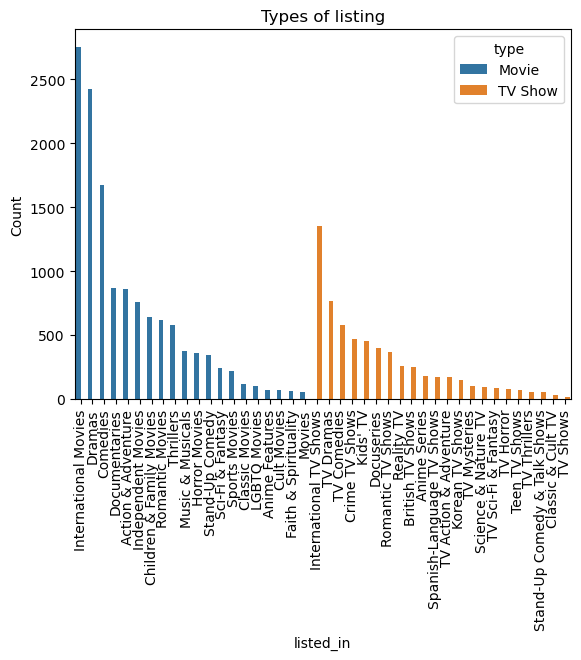

In [14]:
sns.barplot(data=all_grp,
            x='listed_in',
            y=0,
            hue='type')
plt.title('Types of listing')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

The top 3 categories for movies is   
   
|Movie type|Count|
|----|---|
| International Movies | 2752 | 
| Dramas | 2427 |
|Comedies | 1674 |


The top 3 categories for  TV Show is  

|TV Show type|Count|
|----|---|
| International TV Shows | 1351 |
|TV Dramas | 763 |
| TV Comedies | 581 |
 
The above categories are most popular with viewers

### 4.2.3 What is the best time to launch a TV show?

In [ ]:
'''
columns used
-------
df['type']='TV Show'
add_mn
'''

In [64]:
grp_mn=df.groupby(['type','add_mn']).size().reset_index()
grp_mn  = grp_mn[grp_mn['type']=='TV Show']

In [65]:
grp_mn.rename(columns = { 0:'tv show'}, inplace = True)
grp_mn.drop(['type'],axis=1, inplace = True)

In [66]:
grp_mn

,add_mn,tv show
12,1.0,192
13,2.0,181
14,3.0,213
15,4.0,214
16,5.0,193
17,6.0,236
18,7.0,262
19,8.0,236
20,9.0,251
21,10.0,215


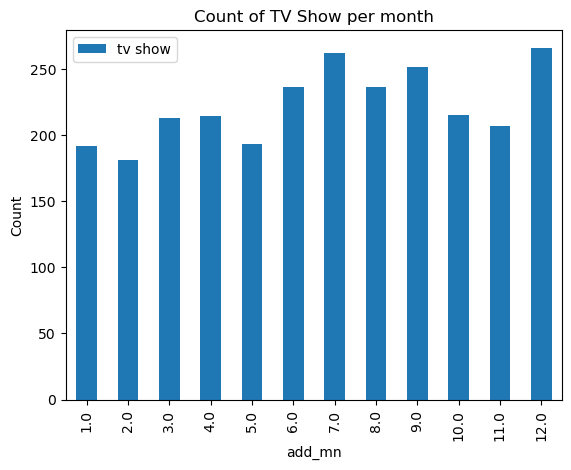

In [67]:
grp_mn.plot(kind="bar" ,x='add_mn',y=['tv show'])
plt.title('Count of TV Show per month')
plt.ylabel('Count')
plt.show()

The top 3, popular months for TV Show is 12,7,9

In [42]:
grp_mn.sort_values(by='tv show',ascending=False)

,add_mn,tv show
23,12.0,266
18,7.0,262
20,9.0,251
17,6.0,236
19,8.0,236
21,10.0,215
15,4.0,214
14,3.0,213
22,11.0,207
16,5.0,193


### 4.2.4 Analysis of actors/directors of different types of shows/movies.

In [ ]:
'''
columns used
-------
df['type']='Movie'
df['type']='TV Show'
xlisted_in :flattened listed_in
xdirector  :flattened director
xcast      :flattened cast
'''

### 4.2.4-a director

In [24]:
dir1 =pd.merge(df['type'],xdirector,left_index=True, right_index=True)
dir2=pd.merge(dir1,xlisted_in,left_index=True, right_index=True)

In [25]:
dir2_mv = dir2[dir2['type']=='Movie']
dir2_tv = dir2[dir2['type']=='TV Show']

In [26]:
top_dir_mv=dir2_mv.groupby(['listed_in','director']).count().reset_index()
top_dir_mv=top_dir_mv.sort_values(by=['listed_in','type'],ascending=[True,False])

In [27]:
top_dir_mv.drop_duplicates(subset=["listed_in"],
                     keep=('first'), inplace=True)
top_dir_mv = top_dir_mv.sort_values(by='type',ascending=False)
top_dir_mv.head()

,listed_in,director,type
1179,Children & Family Movies,Rajiv Chilaka,22
10724,Stand-Up Comedy,Jan Suter,21
7314,International Movies,Cathy Garcia-Molina,13
5740,Dramas,Youssef Chahine,12
147,Action & Adventure,Don Michael Paul,9


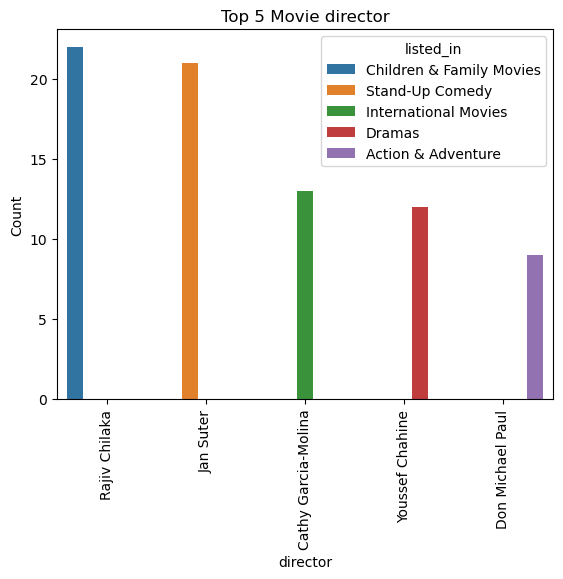

In [29]:
sns.barplot(data=top_dir_mv[:5],x='director',y='type',hue='listed_in')
plt.title('Top 5 Movie director')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [30]:
dir2_tv = dir2[dir2['type']=='TV Show']
top_dir_tv= dir2_tv.groupby(['listed_in','director']).count().reset_index()
top_dir_tv=top_dir_tv.sort_values(by=['listed_in','type'],ascending=[True,False])

In [31]:
top_dir_tv.drop_duplicates(subset=["listed_in"],
                     keep=('first'), inplace=True)
top_dir_tv = top_dir_tv.sort_values(by='type',ascending=False)
top_dir_tv.head()

,listed_in,director,type
121,Docuseries,Alastair Fothergill,3
202,International TV Shows,Alastair Fothergill,3
11,British TV Shows,Alastair Fothergill,3
367,Kids' TV,Iginio Straffi,2
380,Korean TV Shows,Jung-ah Im,2


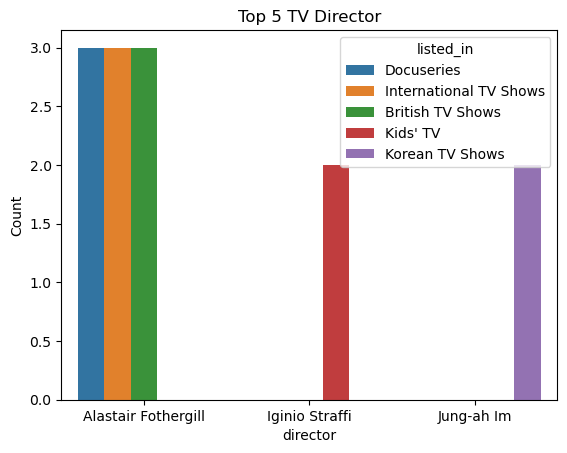

In [32]:
sns.barplot(data=top_dir_tv[:5],x='director',y='type',hue='listed_in')
plt.title('Top 5 TV Director')
plt.ylabel('Count')
plt.show()

In [33]:
dir2_mv['director'].nunique(), dir2_mv['listed_in'].nunique()

(4777, 20)

In [34]:
dir2_tv['director'].nunique(),dir2_tv['listed_in'].nunique()

(299, 22)

### Director Summary
- contains list data. 
- data is flattened using explode() and then analysed   

**Movie**
- No of Directors = 4777
- No of listings = 20

The top 5 directors for movies is   
   
|listed_in|director	|Count|
|----|---|---|
|1. Children & Family Movies  | Rajiv Chilaka |22 |
|2. Stand-Up Comedy | Jan Suter |21 |
|3. International Movies | Cathy Garcia-Molina |13 |
|4. Dramas	 | Youssef Chahine	 |12 |
|5. Action & Adventure	| Don Michael Paul |9 |

**TV Show**
- No of Directors = 299
- No of listings = 22 

The top 5 directors for TV Show is  

|listed_in|director	|Count|
|----|---|---|
|1. Docuseries  | Alastair Fothergill |3 |
|2.British TV Shows| Alastair Fothergill |3 |
|3. International TV Shows | Alastair Fothergill |3 |
|4.Kids' TV	 | Iginio Straffi	 | 2 |
|5. Korean TV Shows	| Jung-ah Im	  |2 |

 

### 4.2.4-b  cast

In [95]:
cast1 =pd.merge(df['type'],xcast,left_index=True, right_index=True)
cast2=pd.merge(cast1,xlisted_in,left_index=True, right_index=True)

In [96]:
cast2_mv = cast2[cast2['type']=='Movie']
cast2_tv = cast2[cast2['type']=='TV Show']

In [97]:
top_cast_mv=cast2_mv.groupby(['listed_in','cast']).count().reset_index()
top_cast_mv=top_cast_mv.sort_values(by=['listed_in','type'],ascending=[True,False])

In [98]:
top_cast_mv.drop_duplicates(subset=["listed_in"],
                     keep=('first'), inplace=True)
top_cast_mv = top_cast_mv.sort_values(by='type',ascending=False)
top_cast_mv.head()

,listed_in,cast,type
46797,International Movies,Anupam Kher,38
24083,Dramas,Anupam Kher,28
8136,Children & Family Movies,Julie Tejwani,26
11794,Comedies,Anupam Kher,20
684,Action & Adventure,Bruce Willis,13


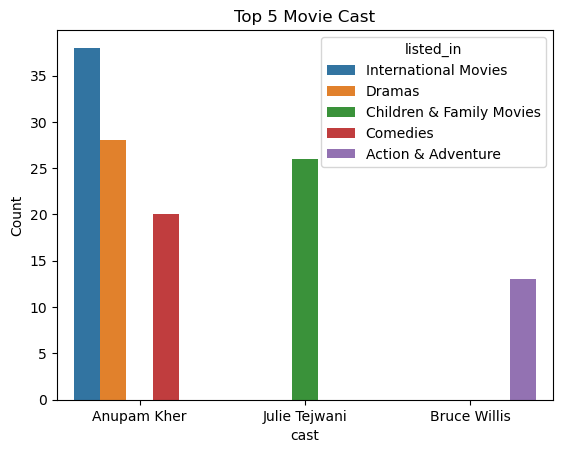

In [99]:
sns.barplot(data=top_cast_mv[:5],x='cast',y='type',hue='listed_in')
plt.title('Top 5 Movie Cast')
plt.ylabel('Count')
plt.show()

In [100]:
cast2_tv = cast2[cast2['type']=='TV Show']
top_cast_tv= cast2_tv.groupby(['listed_in','cast']).count().reset_index()
top_cast_tv=top_cast_tv.sort_values(by=['listed_in','type'],ascending=[True,False])

In [101]:
top_cast_tv.drop_duplicates(subset=["listed_in"],
                     keep=('first'), inplace=True)
top_cast_tv = top_cast_tv.sort_values(by='type',ascending=False)
top_cast_tv.head()

,listed_in,cast,type
778,Anime Series,Takahiro Sakurai,24
14074,International TV Shows,Takahiro Sakurai,22
6063,Docuseries,David Attenborough,14
1209,British TV Shows,David Attenborough,13
17517,Kids' TV,Vincent Tong,13


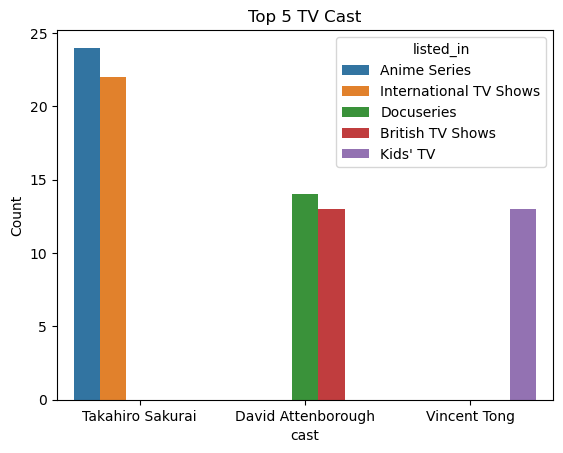

In [83]:
sns.barplot(data=top_cast_tv[:5],x='cast',y='type',hue='listed_in')
plt.title('Top 5 TV Cast')
plt.ylabel('Count')
plt.show()

In [105]:
cast2_mv['cast'].nunique(), cast2_mv['listed_in'].nunique()

(25951, 20)

In [106]:
cast2_tv['cast'].nunique(),cast2_tv['listed_in'].nunique()

(14863, 22)

### cast Summary
**Movie**
- No of casts = 25951
- No of listings = 20  
 

The top 5 casts for movies is   
   
|listed_in|cast	|Count|
|----|---|---|
|1. International Movies  |  Anupam Kher |38 |
|2. Dramas |  Anupam Kher |28 |
|3. Children & Family Movies | Julie Tejwani |26 |
|4. Comedies	 | Anupam Kher	 |20 |
|5. Action & Adventure	|  Bruce Willis |13 |

**TV Show**
- No of casts = 14863
- No of listings = 22  
 

The top 5 casts for TV Show is  

|listed_in|cast	|Count|
|----|---|---|
|1.  Anime series  | Takahiro Sakurai |24 |
|2.International TV Shows| Takahiro Sakurai |22 |
|3. Docuseries |David Attenborough |14 |
|4.British TV Shows | David Attenborough	 | 13 |
|5.Kids' TV	| Vincent Tong	  |13 |
    

### 4.2.5 Does Netflix has more focus on TV Shows than movies in recent years

In [ ]:
'''
columns used
-------
df['type']='Movie'
df['type']='TV Show'
df['release_year']
add_yr
'''

In [70]:
df_typ= df.groupby(['type','add_yr']).size().reset_index()

In [71]:
df_typ.head()

,type,add_yr,0
0,Movie,2008.0,1
1,Movie,2009.0,2
2,Movie,2010.0,1
3,Movie,2011.0,13
4,Movie,2012.0,3


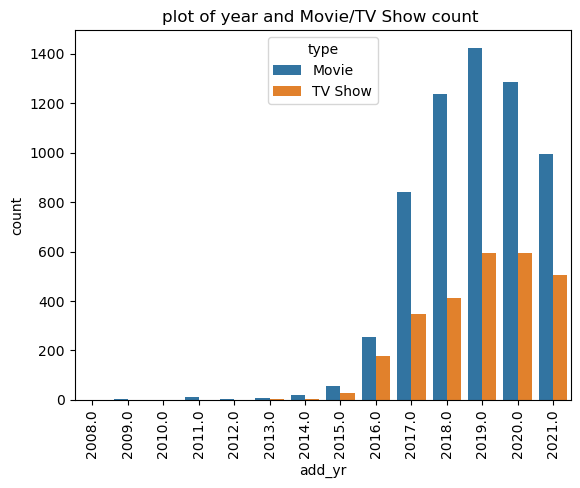

In [84]:
sns.barplot(data=df_typ,
            x='add_yr',
            y=0,
            hue='type')
plt.title('plot of year and Movie/TV Show count ')
plt.ylabel('count')
plt.xticks(rotation=90)
plt.show()

The plot shows that from 2016, more Movies are produced compared to TV Shows

### 4.2.6 Understanding what content is available in different countries

Here we analyse data for top 2 markets 
- United States 
- India

In [ ]:
'''
columns used
-------
df['type']='TV Show'
xlisted_in 
xcountry 
 
'''

In [16]:
grp_con = pd.merge(xcountry,xlisted_in,left_index=True, right_index=True)
cont= pd.merge(df['type'],grp_con,left_index=True, right_index=True)

In [17]:
cont=cont.groupby(['country','type','listed_in']).size().reset_index()
cont_cnt=cont.groupby('country')[0].sum().reset_index()
cont_sum= pd.merge(cont,cont_cnt,on='country')

In [22]:
cont_sum.sort_values(by=['0_y','type','0_x'],ascending=[False,True,False],inplace=True)
cont_sum 

,country,type,listed_in,0_x,0_y
1340,United States,Movie,Dramas,835,6780
1337,United States,Movie,Comedies,680,6780
1339,United States,Movie,Documentaries,512,6780
1333,United States,Movie,Action & Adventure,404,6780
1335,United States,Movie,Children & Family Movies,390,6780
...,...,...,...,...,...
694,Kazakhstan,Movie,Children & Family Movies,1,1
862,Nicaragua,Movie,Documentaries,1,1
1071,Somalia,Movie,Dramas,1,1
1165,Sudan,Movie,Dramas,1,1


### 4.2.6-a United States

In [23]:
cont_sum_us = cont_sum[cont_sum['country']=='United States'] 

In [24]:
cont_sum_us 

,country,type,listed_in,0_x,0_y
1340,United States,Movie,Dramas,835,6780
1337,United States,Movie,Comedies,680,6780
1339,United States,Movie,Documentaries,512,6780
1333,United States,Movie,Action & Adventure,404,6780
1335,United States,Movie,Children & Family Movies,390,6780
1343,United States,Movie,Independent Movies,390,6780
1352,United States,Movie,Thrillers,292,6780
1348,United States,Movie,Romantic Movies,225,6780
1351,United States,Movie,Stand-Up Comedy,216,6780
1342,United States,Movie,Horror Movies,201,6780


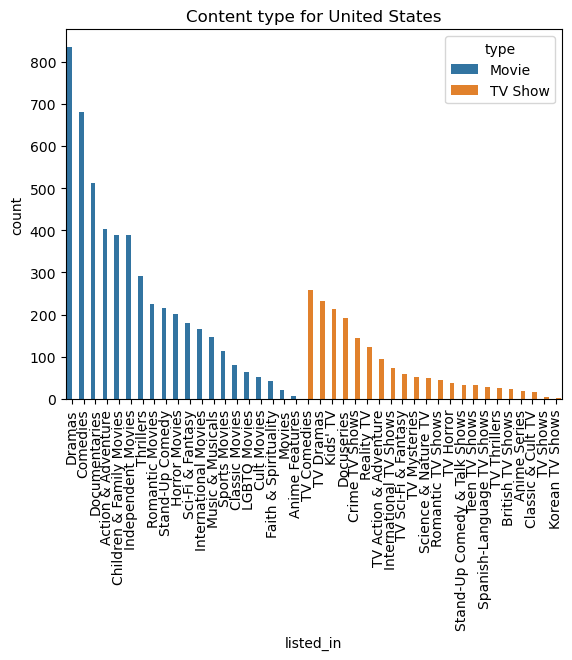

In [25]:
sns.barplot(data=cont_sum_us,
            x='listed_in',
            y='0_x',
            hue='type')
plt.title('Content type for United States')
plt.xticks(rotation=90)
plt.ylabel('count')
plt.show()

The top 3 categories for United States movies is   
   
|Movie type|Count|
|----|---|
| Dramas | 835 |
|Comedies | 680 |
| Documentaries | 512 |

The top 3 categories for United States TV Show is  

|TV Show type|Count|
|----|---|
| TV Comedies | 258 |
|TV Dramas | 232 |
| Kids' TV | 214 |
 

### 4.2.6-b India

In [26]:
cont_sum_in = cont_sum[cont_sum['country']=='India'] 

In [29]:
cont_sum_in

,country,type,listed_in,0_x,0_y
523,India,Movie,International Movies,864,2804
519,India,Movie,Dramas,662,2804
516,India,Movie,Comedies,323,2804
522,India,Movie,Independent Movies,167,2804
513,India,Movie,Action & Adventure,137,2804
526,India,Movie,Romantic Movies,120,2804
525,India,Movie,Music & Musicals,96,2804
530,India,Movie,Thrillers,92,2804
521,India,Movie,Horror Movies,35,2804
518,India,Movie,Documentaries,27,2804


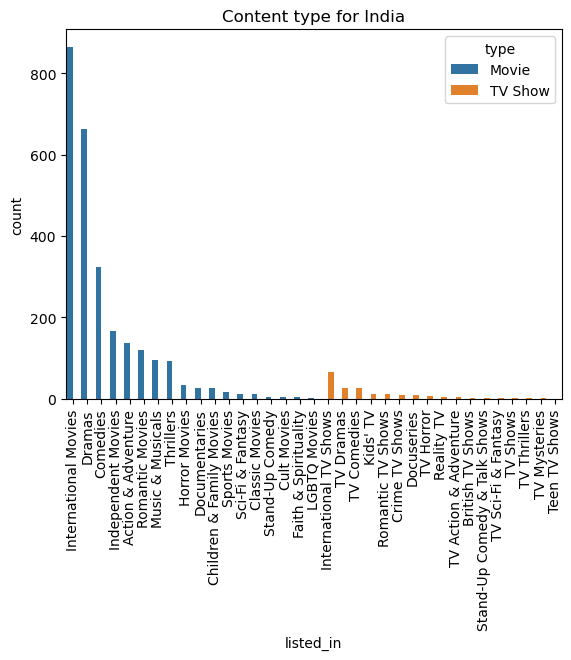

In [28]:
sns.barplot(data=cont_sum_in,
            x='listed_in',
            y='0_x',
            hue='type')
plt.title('Content type for India')
plt.xticks(rotation=90)
plt.ylabel('count')
plt.show()

The top 3 categories for India movies is   
   
|Movie type|Count|
|----|---|
| International Movies | 864 | 
| Dramas | 662 |
|Comedies | 323 |


The top 3 categories for India TV Show is  

|TV Show type|Count|
|----|---|
| International TV Shows | 66 |
|TV Dramas | 28 |
| TV Comedies | 26 |
 
 
 **for top 2 markets (US,India) we find that the most popular categories are dramas,Comedies**

The top 3 categories for movies is   
   
|Movie type|Count|
|----|---|
| International Movies | 2752 | 
| Dramas | 2427 |
|Comedies | 1674 |


The top 3 categories for  TV Show is  

|TV Show type|Count|
|----|---|
| International TV Shows | 1351 |
|TV Dramas | 763 |
| TV Comedies | 581 |
 
The above categories are most popular with viewers

## 5. Missing Value & Outlier check

In [121]:
df['release_year'].describe()

count    8807.000000
mean     2014.180198
std         8.819312
min      1925.000000
25%      2013.000000
50%      2017.000000
75%      2019.000000
max      2021.000000
Name: release_year, dtype: float64

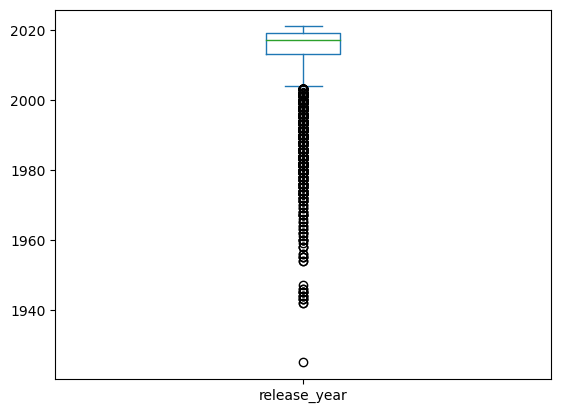

In [123]:
df['release_year'].plot(kind='box')
plt.show()

- above plot shows  "release_year" column has outliers. 
- data range is (1925,2021)
- These data could be valid since they could be classical or historic content.   
  **So this data should be retained**

In [282]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
 12  add_yr        8797 non-null   float64       
 13  add_mn        8797 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(10)
memory usage: 963.4+ KB


In [283]:
#replace null with unknown in col "rating"
df['rating'].fillna('unknown',inplace=True)

In [284]:
#locate rows having value min in column "rating"
ix= df[df['rating'].str.contains('min')]

In [285]:
ix

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,add_yr,add_mn
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi...",2017.0,4.0
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...,2016.0,9.0
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...,2016.0,8.0


In [286]:
#swap values for "rating" & "duration" for these records 
df.loc[ix.index, 'duration'] = ix['rating']
df.loc[ix.index, 'rating']   = ix['duration']

In [287]:
#verify update
df.loc[ix.index]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,add_yr,add_mn
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,NaN,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi...",2017.0,4.0
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,NaN,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...,2016.0,9.0
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,NaN,66 min,Movies,The comic puts his trademark hilarious/thought...,2016.0,8.0


# 6. Insights based on Non-Graphical and Visual Analysis

**release_year** 

- **release year range = (1925,2021)**
-**93.6 %** of content released after 2000
- Most releases are in 2018,2017,2019
- **6.4%** content released before 2000. These could be classical or historic content.

**Country**
1. Netflix operates in **123** countries.
2. This column has **7.6%** missing data. Since this is an important column of business significance. Efforts should be made to keep missing data minimum for this feature.  
3. The Top 5 markets for Netflix are as below.They comprise **63  %** of market.      

|Country|%Share|
|----|---|
| United States | 36.83 |
| India | 10.44 |
| United Kingdom | 8.04 |
| Canada | 4.44 |
| France | 3.92 |

**type**  
1. There are total of 2 types
2. The top type is **"Movie"**  constituting **70%** of type. **Tv Shows** constitute remaining **30%**

**show_id**    
The values of show_id is unique for each record. So it can be used as primary key(record identifier)

**title**
- 'title' is unique for each record

**date_added**
- column contains dates.This can be used to identify time trends
-created two new columns from this column **add_yr,add_mn** for easy analysis

**add_yr**   
The top 5 entries shown below constitute 93% of values.So most activity is in years 2017 to 2021

|added_year|Count|
|----|---|
| 2019 | 2016 |
| 2020 | 1879 |
| 2018 | 1649 |
| 2021 | 1498 |
| 2017 | 1188 |

**rating**   
1. There are total of 17 ratings
2. this column has  4 unknown values.
3. there are few values having minutes.These should be moved to duration column       
4. The top 5 ratings are as below. they constitute **85%** of rating

|rating|%Share|  
|----|-----|   
| TV-MA |      36.43 |
| TV-14  |     24.54|
| TV-PG   |     9.80|
| R         |   9.08|
| PG-13    |    5.57|

**duration**
1. There are total of 220 duration
2. this column has  3 unknown values. 
3. The top 5 duration are as below. they constitute **31%** of duration

|duration|%Share|  
|----|-----|  
|1 Season  |   20.37|
| 2 Seasons  |   4.83|
| 3 Seasons  |   2.26|
| 90 min    |    1.73|
| 94 min   |     1.66|

**description**   
This is a text column which describes the content.

**listed_in**
1. There are total of **42** listed types
2. The top 5 listed types are as below. They comprise **47%** of content   

|listed_in|%Share|
|----|---|
| International Movies | 14.24 |
| Dramas | 12.56 |
| Comedies | 8.66 |
| International TV Shows | 6.99 |
| Documentaries | 4.50 |


### Director Summary
- contains list data. 
- data is flattened using explode() and then analysed  


**Movie**
- No of Directors = 4777
- No of listings = 20

The top 5 directors for movies is   
   
|listed_in|director	|Count|
|----|---|---|
|1. Children & Family Movies  | Rajiv Chilaka |22 |
|2. Stand-Up Comedy | Jan Suter |21 |
|3. International Movies | Cathy Garcia-Molina |13 |
|4. Dramas	 | Youssef Chahine	 |12 |
|5. Action & Adventure	| Don Michael Paul |9 |

**TV Show**
- No of Directors = 299
- No of listings = 22 

The top 5 directors for TV Show is  

|listed_in|director	|Count|
|----|---|---|
|1. Docuseries  | Alastair Fothergill |3 |
|2.British TV Shows| Alastair Fothergill |3 |
|3. International TV Shows | Alastair Fothergill |3 |
|4.Kids' TV	 | Iginio Straffi	 | 2 |
|5. Korean TV Shows	| Jung-ah Im	  |2 |

 

### Cast Summary   
- contains list data. 
- data is flattened using explode() and then analysed  

**Movie**
- No of casts = 25951
- No of listings = 20  
 

The top 5 casts for movies is   
   
|listed_in|cast	|Count|
|----|---|---|
|1. International Movies  |  Anupam Kher |38 |
|2. Dramas |  Anupam Kher |28 |
|3. Children & Family Movies | Julie Tejwani |26 |
|4. Comedies	 | Anupam Kher	 |20 |
|5. Action & Adventure	|  Bruce Willis |13 |

**TV Show**
- No of casts = 14863
- No of listings = 22  
 

The top 5 casts for TV Show is  

|listed_in|cast	|Count|
|----|---|---|
|1.  Anime series  | Takahiro Sakurai |24 |
|2.International TV Shows| Takahiro Sakurai |22 |
|3. Docuseries |David Attenborough |14 |
|4.British TV Shows | David Attenborough	 | 13 |
|5.Kids' TV	| Vincent Tong	  |13 |
    

**add_mn**   
The top 3, popular months for TV Show is 12(december),7(july),9(september)

**Popular categories of Movie/TV Show**   
The top 3 categories for movies is   
   
|Movie type|Count|
|----|---|
| International Movies | 2752 | 
| Dramas | 2427 |
|Comedies | 1674 |


The top 3 categories for  TV Show is  

|TV Show type|Count|
|----|---|
| International TV Shows | 1351 |
|TV Dramas | 763 |
| TV Comedies | 581 |
 
The above categories are most popular with viewers

**Popular content in United States**
The top 3 categories for United States movies is   
   
|Movie type|Count|
|----|---|
| Dramas | 835 |
|Comedies | 680 |
| Documentaries | 512 |

The top 3 categories for United States TV Show is  

|TV Show type|Count|
|----|---|
| TV Comedies | 258 |
|TV Dramas | 232 |
| Kids' TV | 214 |
 

**Popular Content in India**

The top 3 categories for movies is   
   
|Movie type|Count|
|----|---|
| International Movies | 2752 | 
| Dramas | 2427 |
|Comedies | 1674 |


The top 3 categories for  TV Show is  

|TV Show type|Count|
|----|---|
| International TV Shows | 1351 |
|TV Dramas | 763 |
| TV Comedies | 581 |
 
The above categories are most popular with viewers

# 7. Business Insights

- Netflix operates in 123 countries with top 5 markets having 63% of market   
   |Country|%Share|  
|----|---|  
| United States | 36.83 |
| India | 10.44 |
| United Kingdom | 8.04 |
| Canada | 4.44 |
| France | 3.92 |
- 94 % of content released after 2000
- 70% of content is Movies and 30% is TV Shows 
- There are 17 rating types  with top 5 ratings having 85% share
- top 5 duration values constitute 31% share of duration    
- popular "listing_in" types  
    The top 3 categories for movies is   
   
|Movie type|Count|
|----|---|
| International Movies | 2752 | 
| Dramas | 2427 |
|Comedies | 1674 |

       The top 3 categories for  TV Show is  

|TV Show type|Count|
|----|---|
| International TV Shows | 1351 |
|TV Dramas | 763 |
| TV Comedies | 581 |
 
The  most popular categories(listing_in) are **International movies/TV Shows,Dramas & Comedies**

# 8. Recommendations

- Currently the top 5 markets account for 63% share. So there is big scope for  expansion in other countries
- Currently TV Shows have 30% share,so there is scope for expansion in this segment
- Most popular listings are International Movies/TV Shows,Dramas and Comedies. So more content in these categories should be considered to increase business
- add_yr data shows increasing trend in recent years.This shows increaing demand.With proper marketing and content this demand can be converted into increasing business   
- The rating give an idea of taget audience. The top 5 ratings constitute 85% share.More content tagetting this group should be produced to increase business   
- For TV Shows the top directors are not from popular listing. So the number of directors can be increased.
- The most popular movie actor for the popular categories(International Movies,Dramas,Comedies) is Anupam Kher. Producing more content with this popular actor will increase business   
- The most popular TV actor is Takahiro Sakurai for Anime Series,International TV Shows. Producing more content with this popular actor will increase business